In [1]:
from _util import *
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
tqdm.pandas()


c:\Users\lw\miniconda3\envs\masterarbeit_lwo\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
overview = pd.DataFrame(load_json("../00_data/EURES/eures_overview_total.json"))
len(overview)

212883

# Analysis of overview


In [3]:
overview_unique = overview.drop_duplicates("url")
len(overview_unique)

161179

In [4]:
overview_unique = overview_unique[~overview_unique["esco_jobs"].isnull()]
len(overview_unique)

161178

In [5]:
overview_unique["no_esco_jobs"] = overview_unique["esco_jobs"].apply(len)

In [6]:
df = pd.DataFrame(overview_unique["no_esco_jobs"].value_counts())
df

,no_esco_jobs
1,67067
3,50042
2,44025
0,42
6,1
4,1


Text(0, 0.5, 'Count of Adverts')

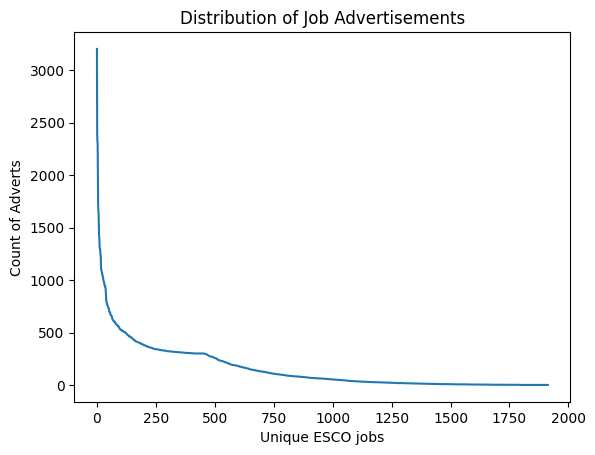

In [7]:
D = sort_dict(Counter(flatten_list(overview_unique["esco_jobs"])))
fig, ax = plt.subplots()
line, = ax.plot(range(len(D)), list(D.values()))
ax.set_title('Distribution of Job Advertisements')
ax.set_xlabel('Unique ESCO jobs')
ax.set_ylabel('Count of Adverts')

# Analysis of parsed ads 

In [9]:
final_ads = pd.DataFrame(load_json("../00_data/EURES/0_pars_short_ads_final.json"))

In [11]:
model = SentenceTransformer("../00_data/SBERT_Models/jobgbert_batch32_woTSDAE_2e-05_f10")

In [12]:
def get_token_length(text):
    return len(model.tokenizer.tokenize(text))

In [13]:
final_ads["length_desc"] = final_ads["description"].progress_apply(get_token_length)
final_ads["length_short"] = final_ads["short_texts"].progress_apply(get_token_length)

  0%|          | 0/152071 [00:00<?, ?it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (1109 > 512). Running this sequence through the model will result in indexing errors


100%|██████████| 152071/152071 [04:06<00:00, 617.73it/s] 


In [14]:
len((final_ads["esco_id"].unique()))

1700

In [15]:
unqiue_texts = final_ads.drop_duplicates("description").reset_index(drop=True)
len(unqiue_texts)

84853

In [16]:
unqiue_texts["max_tokens"] = 512
unqiue_texts["over_tokenlimit_desc"] = final_ads["length_desc"] > 512
unqiue_texts["over_tokenlimit_short"] = final_ads["length_short"] > 512

In [17]:
display(unqiue_texts[["over_tokenlimit_desc"]].value_counts(normalize=True))
display(unqiue_texts[["over_tokenlimit_short"]].value_counts(normalize=True))

over_tokenlimit_desc
False                   0.610691
True                    0.389309
dtype: float64

over_tokenlimit_short
False                    0.928311
True                     0.071689
dtype: float64

In [18]:
len(unqiue_texts[["length_short"]])

84853

In [19]:
unqiue_texts

,searched_esco_job,title,url,esco_jobs,publication_date,esco_job,esco_id,description,has_alpha,length,count,short_texts,length_desc,length_short,max_tokens,over_tokenlimit_desc,over_tokenlimit_short
0,Wasserqualitätsanalytiker/Wasserqualitätsanaly...,Sachbearbeiter landwirtschaftlicher Gewässers...,https://ec.europa.eu/eures/portal/jv-se/jv-det...,[Wasserqualitätsanalytiker/Wasserqualitätsanal...,24.03.2023,Wasserqualitätsanalytiker/Wasserqualitätsanaly...,2133.12,Stellenangebotsbeschreibung: Im Landkreis Spre...,True,752.0,2,Sachbearbeiter landwirtschaftlicher Gewässers...,187,15,512,False,False
1,Wasserqualitätsanalytiker/Wasserqualitätsanaly...,Sachbearbeiter landwirtschaftlicher Gewässers...,https://ec.europa.eu/eures/portal/jv-se/jv-det...,[Wasserqualitätsanalytiker/Wasserqualitätsanal...,22.03.2023,Wasserqualitätsanalytiker/Wasserqualitätsanaly...,2133.12,Stellenangebotsbeschreibung: Im Landkreis Spre...,True,752.0,2,Sachbearbeiter landwirtschaftlicher Gewässers...,190,15,512,False,False
2,Chemieingenieur/Chemieingenieurin,Sachbearbeitung Grundwasser (Ingenieure/Ingen...,https://ec.europa.eu/eures/portal/jv-se/jv-det...,"[Büroassistent/Büroassistentin, Bauingenieur/B...",24.03.2023,Büroassistent/Büroassistentin,4110.1,Stellenangebotsbeschreibung: Sachbearbeitung G...,True,6031.0,935,Stellenangebotsbeschreibung: Sachbearbeitung G...,1109,560,512,False,False
3,Wirtschaftsingenieur/Wirtschaftsingenieurin,Baukaufmann / Projektkaufmann für Bauprojekte...,https://ec.europa.eu/eures/portal/jv-se/jv-det...,"[Baukalkulator/Baukalkulatorin, Wirtschaftsing...",25.03.2023,Büroassistent/Büroassistentin,4110.1,Stellenangebotsbeschreibung: Deutsche Bahn AG ...,True,3200.0,935,Stellenangebotsbeschreibung: Deutsche Bahn AG ...,605,544,512,False,False
4,Baukalkulator/Baukalkulatorin,Projektkaufmann im Großprojekt Karlsruhe - Ba...,https://ec.europa.eu/eures/portal/jv-se/jv-det...,[Akademische und vergleichbare Fachkräfte im B...,25.03.2023,Büroassistent/Büroassistentin,4110.1,Stellenangebotsbeschreibung: Deutsche Bahn AG ...,True,3682.0,935,Stellenangebotsbeschreibung: Deutsche Bahn AG ...,676,460,512,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84848,Qualitätsbeauftragter in der Textilindustrie/Q...,Qualitätsmanager (w/m/d) im Pharmabereich,https://ec.europa.eu/eures/portal/jv-se/jv-det...,[Qualitätsbeauftragter in der Textilindustrie/...,26.09.2022,Qualitätsbeauftragter in der Textilindustrie/Q...,1321.1.2.3,Die ManpowerGroup ist eine der weltweit führen...,True,2453.0,9,Qualitätssicherung in einem erfolgreichen Phar...,522,274,512,False,False
84849,Qualitätsbeauftragter in der Textilindustrie/Q...,engagierte(n) Mitarbeiter(in) für Qualitätssi...,https://ec.europa.eu/eures/portal/jv-se/jv-det...,[Qualitätsbeauftragter in der Textilindustrie/...,20.07.2022,Qualitätsbeauftragter in der Textilindustrie/Q...,1321.1.2.3,"Wir sind ein erfolgreiches, international täti...",True,1855.0,9,suchen wir in Vollzeit 1 engagierte ( n ) Mita...,370,154,512,True,False
84850,Qualitätsbeauftragter in der Textilindustrie/Q...,Technische_r Qualitätsmanager_in Engineering,https://ec.europa.eu/eures/portal/jv-se/jv-det...,[Qualitätsbeauftragter in der Textilindustrie/...,05.07.2022,Qualitätsbeauftragter in der Textilindustrie/Q...,1321.1.2.3,Dynamic Personaldienste blickt auf über 35 Jah...,True,2901.0,9,zur Unterstützung des Teams im Bezirk Mödling ...,533,316,512,True,True
84851,Qualitätsbeauftragter in der Textilindustrie/Q...,Sachbearbeitung - Zertifizierung und\nKontrol...,https://ec.europa.eu/eures/portal/jv-se/jv-det...,[Qualitätsbeauftragter in der Textilindustrie/...,05.07.2022,Qualitätsbeauftragter in der Textilindustrie/Q...,1321.1.2.3,BIOS - Biokontrollservice Österreich mit Firm...,True,1943.0,9,BIOS - Biokontrollservice Österreich mit Firme...,422,177,512,True,False


<Axes: title={'center': 'Token count per Job Advert'}, xlabel='Job Adverts', ylabel='No of Tokens'>

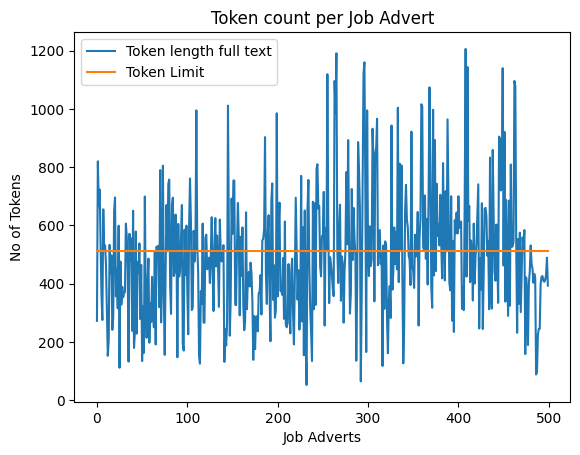

In [20]:
plot_len_df = unqiue_texts.iloc[500:1000][["length_short","length_desc","max_tokens"]].rename(
    {"length_desc":"Token length full text",
    "max_tokens":"Token Limit",
    "length_short":"Token length short text"},axis=1)
plot_len_df.reset_index(drop=True).plot(y=["Token length full text","Token Limit"],ylabel="No of Tokens",xlabel="Job Adverts", title="Token count per Job Advert")

<Axes: xlabel='Job Adverts', ylabel='No of Tokens'>

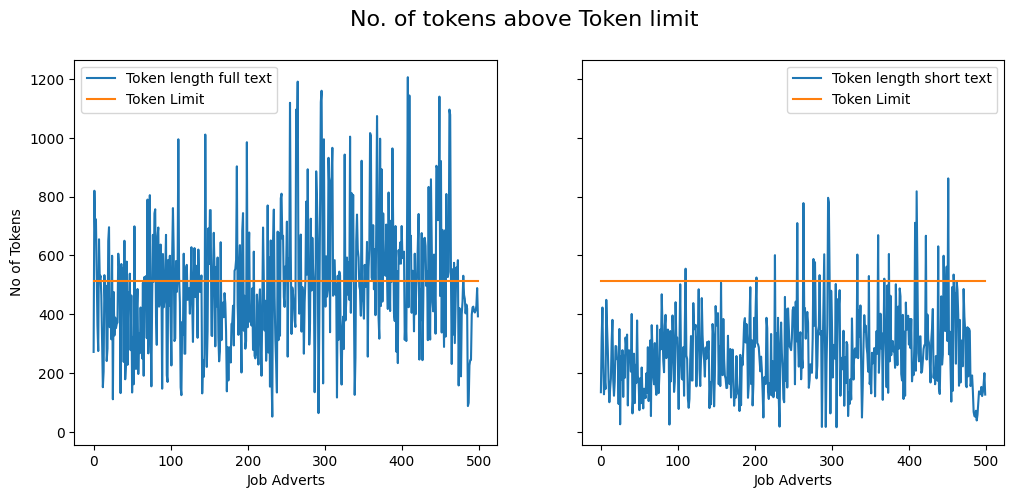

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 5))
fig.suptitle('No. of tokens above Token limit', fontsize=16)
plot_len_df.reset_index(drop=True).plot(y=["Token length full text","Token Limit"],
ylabel="No of Tokens",xlabel="Job Adverts", ax=axes[0])
plot_len_df.reset_index(drop=True).plot(y=["Token length short text","Token Limit"],
ylabel="No of Tokens",xlabel="Job Adverts", ax=axes[1])